In [1]:
# To check if GPU is active
from tensorflow.python.client import device_lib

# Load Data
import os
import cv2
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt

# Model Training
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17127454576755026961
xla_global_id: -1
]


In [3]:
train_dir = 'C:/Users/Sahil/OneDrive/Desktop/ASL/asl_alphabet_train'
test_dir = 'C:/Users/Sahil/OneDrive/Desktop/ASL/asl_alphabet_test'

In [4]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Obtaining images of", dir_list[i], "...")
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Obtaining images of A ...
Obtaining images of B ...
Obtaining images of C ...
Obtaining images of D ...
Obtaining images of del ...
Obtaining images of E ...
Obtaining images of F ...
Obtaining images of G ...
Obtaining images of H ...
Obtaining images of I ...
Obtaining images of J ...
Obtaining images of K ...
Obtaining images of L ...
Obtaining images of M ...
Obtaining images of N ...
Obtaining images of nothing ...
Obtaining images of O ...
Obtaining images of P ...
Obtaining images of Q ...
Obtaining images of R ...
Obtaining images of S ...
Obtaining images of space ...
Obtaining images of T ...
Obtaining images of U ...
Obtaining images of V ...
Obtaining images of W ...
Obtaining images of X ...
Obtaining images of Y ...
Obtaining images of Z ...


In [5]:
print(len(X), len(y))

87000 87000


In [6]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

<Figure size 640x480 with 0 Axes>

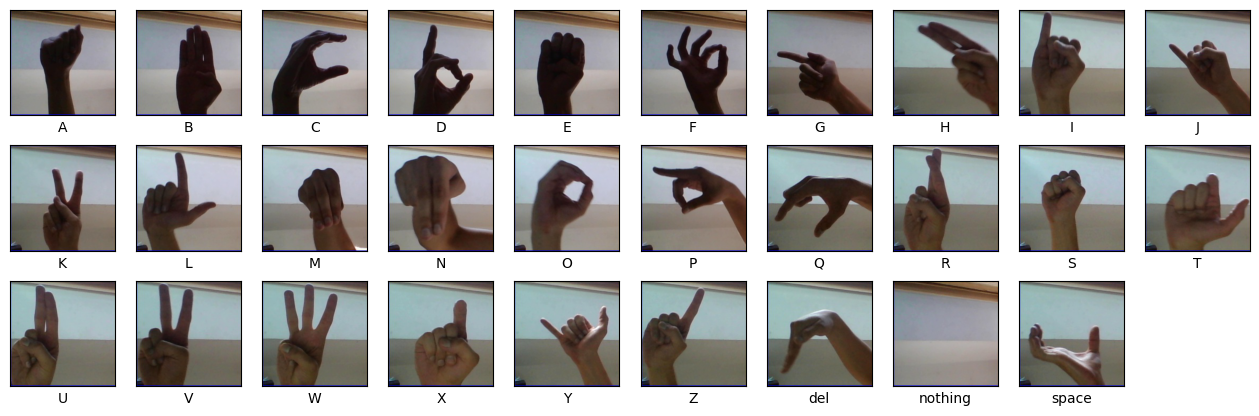

In [7]:
def plot_sample_images():
    figure = plt.figure()
    plt.figure(figsize=(16,5))

    for i in range (0,29):
        plt.subplot(3,10,i+1)
        plt.xticks([])
        plt.yticks([])
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        img = plt.imread(path)
        plt.imshow(img)
        plt.xlabel(classes[i])
        
plot_sample_images()

In [8]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32')/255.0
    
    label_encoded_y = utils.to_categorical(y)
    
    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size = 0.1)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

In [9]:
print("Training data:", x_train.shape)
print("Test data:", x_test.shape)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


In [10]:
classes = 29
batch = 32
epochs =15
learning_rate = 0.01

In [11]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

C:\Users\Sahil\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
adam = Adam(learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │          29,725 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,597,661 (17.54 MB)

 Trainable params: 4,596,765 (17.54 MB)

 Non-trainable params: 896 (3.50 KB)

In [14]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 262s 130ms/step - accuracy: 0.1606 - loss: 4.0514 - val_accuracy: 0.3490 - val_loss: 2.0637
Epoch 2/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 254s 126ms/step - accuracy: 0.5116 - loss: 1.4809 - val_accuracy: 0.6693 - val_loss: 1.0267
Epoch 3/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 251s 128ms/step - accuracy: 0.7682 - loss: 0.7125 - val_accuracy: 0.7505 - val_loss: 0.9078
Epoch 4/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 263s 129ms/step - accuracy: 0.8252 - loss: 0.5623 - val_accuracy: 0.8442 - val_loss: 0.5222
Epoch 5/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 205s 105ms/step - accuracy: 0.8532 - loss: 0.5048 - val_accuracy: 0.8388 - val_loss: 0.5466
Epoch 6/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 193s 99ms/step - accuracy: 0.8725 - loss: 0.4683 - val_accuracy: 0.7405 - val_loss: 1.0680
Epoch 7/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 205s 100ms/step - accuracy: 0.8925 - loss: 0.4204 - val_accuracy: 0.8821 - val_loss: 0.4343
Epoch 8/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 204s 101ms/step - acc

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Accuracy:', test_acc)
print('Test loss', test_loss)

272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9467 - loss: 0.1930
Test Accuracy: 0.9513792991638184
Test loss 0.17800910770893097


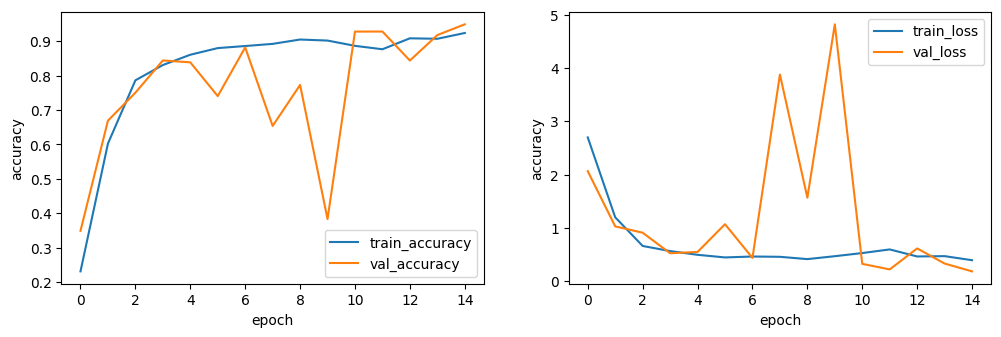

In [16]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)

In [17]:
model.save("sign_language_model.h5")

In [18]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("sign_language_model.h5")  # Or the SavedModel format folder


In [19]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

272/272 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9467 - loss: 0.1930
Test Loss: 0.1780
Test Accuracy: 95.14%


In [20]:
# Predict for a single test instance
predicted_class = model.predict(x_test[0:1])  # Predict on one sample
predicted_label = predicted_class.argmax()    # Get the class index
print(f"Predicted Label: {predicted_label}, True Label: {y_test[0]}")

# Predict for the entire test dataset
predictions = model.predict(x_test)
predicted_labels = predictions.argmax(axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
Predicted Label: 10, True Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
272/272 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step


In [21]:
from sklearn.preprocessing import LabelEncoder

LABELS = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
label_encoder = LabelEncoder()
label_encoder.fit(LABELS)

LabelEncoder()

In [22]:
y_pred = model.predict(x_test).argmax(axis=1)

272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step


In [27]:
y_pred.shape

(8700,)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict labels for the test set
y_pred = model.predict(x_test).argmax(axis=1)

# Print the classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [25]:
y_pred = model.predict(x_test).argmax(axis=1)

272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert y_test to multiclass if needed
y_test = y_test.argmax(axis=1)

# Generate classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [29]:
print("Classes from label encoder:", label_encoder.classes_)
print("Number of classes in label encoder:", len(label_encoder.classes_))
print("Model output shape:", model.output_shape)

Classes from label encoder: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' 'del' 'nothing' 'space']
Number of classes in label encoder: 29
Model output shape: (None, 29)


In [30]:
import numpy as np

unique_labels = np.unique(y_train)
print("Unique labels in training data:", unique_labels)
print("Number of unique labels:", len(unique_labels))

Unique labels in training data: [0. 1.]
Number of unique labels: 2
